라이브러리란?
- 다른 프로그램의 구성 요소로 사용하기 위해 미리 만들어 둔 프로그램 조각이다. 즉, 자주 사용하는 기능을 모듈·패키지로 만들어 둔 것이다. 
- 한 번 만들어 놓으면 여러 프로그램에서 재사용이 다른 사람과 공유까지 가능하다.
- 사용방법
1. 필요한 기능을 가진 라이브러리를 설치(pip install 라이브러리이름)한다. 
2. import문으로 라이브러리를 사용한다는 명시를 코드에 작성합니다. 

라이브러리를 import하는 방법
- import 모듈 : 모듈에 있는 모든 기능을 사용할 때 명시
- from 모듈 import 이름 : 모듈 안에 있는 특정 기능을 사용할 때 명시
- import 모듈 as 별명 : 모듈의 기능을 사용할 때 별명으로 사용하겠다는 의미 

In [1]:
from datetime import datetime
now = datetime.now()
print(now)

2021-11-14 23:12:03.718265


In [2]:
from datetime import datetime as dt
now = dt.now()
print(now)

2021-11-14 23:12:04.068252


워드클라우드란?
- 많은 텍스트 데이터를 직관적으로 시각화시켜주는 라이브러리
- 텍스트 중 자주 언급된 단어들이 크게 시각화

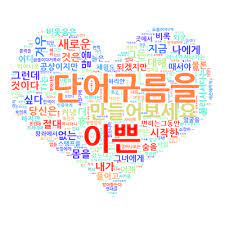

matplotlib란?
- 이미지나 그래프를 시각화해주는 라이브러리
- 주피터노트북을 사용하면 시각화 결과를 바로 확인할 수 있다.

## 이번 실습 목표
1. 워드클라우드와 한글폰트 설치
2. 한글형태소 분석 라이브러리 설치
3. 텍스트 속 명사들을 워드클라우드 형태로 시각화하기
4. 판다스 맛보기

### 워드클라우드와 한글폰트 설치

!를 앞에 입력하면 cmd창에 명령어를 바로 입력할 수 있습니다.

In [3]:
! pip install wordcloud matplotlib

You should consider upgrading via the 'c:\users\test\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


#### [나눔 폰트 설치하기](https://hangeul.naver.com/font)

- 다운받은 ttf파일들을 C:/Windows/Fonts로 옮겨줍니다.
- 관리자 권한으로 cmd 실행 
- cd 다운된 ttf파일이 있는 폴더의 절대 경로
- move 폰트이름.ttf C:/Windows/fonts

### 한글형태소 분석 라이브러리 설치

#### [JRE 설치하기](https://java.com/en/download/)
- 사용자 변수 추가: JAVA_HOME = jre폴더의 절대주소
- 시스템 변수 추가: PATH = jre/bin 폴더의 절대주소

#### jpype 설치

In [14]:
! pip install JPype1-1.2.0-cp38-cp38-win_amd64.whl

Processing c:\users\test\desktop\class\jpype1-1.2.0-cp38-cp38-win_amd64.whl


You should consider upgrading via the 'c:\users\test\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


#### nltk konlpy 설치

In [15]:
! pip install nltk konlpy

You should consider upgrading via the 'c:\users\test\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


#### tweepy 버전도 3.10.0버전으로 수정해야 됩니다. <==(강의에는 없지만 이것도 꼭 실행시켜서 설치해주세요!!)

In [6]:
!pip install tweepy==3.10.0

You should consider upgrading via the 'c:\users\test\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


#### 설치를 다하셨으면 현재 열린 주피터 노트북과 cmd창을 닫고 다시 새 cmd창에서 주피터 노트북을 실행시켜 주세요!!

### 워드클라우드 사용하기

In [3]:
import matplotlib.pyplot as plt
import matplotlib
from wordcloud import WordCloud

open 명령어를 사용해 텍스트 파일을 열고 read함수를 사용해 입력된 전체 텍스트 문장을 가져옵니다.

In [4]:
파일 = open('노래가사.txt',encoding='utf-8')
텍스트 = 파일.read()
텍스트

'흔들리는 꽃들 속에서\n네 샴푸향이 느껴진거야\n스쳐지나간건가 뒤돌지만\n그냥 사람들만 보이는거야\n다와가는 집근처에서\n괜히 핸드폰만 만지는거야\n한번 연락해 볼까 용기내지만\n그냥 내 마음만 아쉬운 거야\n걷다가 보면 항상 이렇게 너를\n바라만 보던 너를 기다린다고 말할까\n지금 집앞에 계속 이렇게 너를\n아쉬워 하다 너를 연락했다 할까\n지나치는 꽃들 속에서\n네 샴푸향만 보이는거야\n스쳐지나간건가 뒤 돌아보면\n그냥 내 마음만 바빠진거야\n걷다가 보면 항상 이렇게 너를\n바라만 보던 너를 기다린다고 말할까\n지금 집앞에 계속 이렇게 너를\n아쉬워 하다 너를 연락했다 할까\n어떤 계절이 너를 우연히라도 너를 마주치게 할까\n난 이대로 아쉬워하다 너를\n바라만 보던 너를 기다리면서\n아무말 못하고 그리워만 할까\n걷다가 보면 항상 이렇게 너를\n바라만 보던 너를 생각한다고 말할까\n지금 집앞에 기다리고 때론 지나치고 다시 기다리는\n꽃이 피는 거리에 보고파라 이밤에\n걷다가 보면 항상 이렇게 너를\n아쉬워 하다 너를 기다린다고 말할까\n지금 집앞에 계속 이렇게 너를\n아쉬워 하다 너를 연락했다 할까'

In [5]:
matplotlib.rcParams["font.family"] = "NanumGothic"
폰트위치 = 'C:/Windows/Fonts/NanumGothic.ttf'

말구름 이미지 = WordCloud(font_path = 폰트위치,background_color=바탕색깔).generate(텍스트)

plt를 통해 화면에 출력할 영역 크기와 출력할 이미지를 넣는다

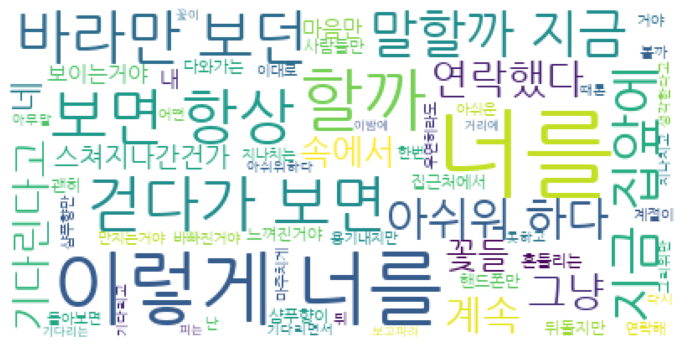

In [6]:
텍스트구름 = WordCloud(font_path = 폰트위치,background_color='white').generate(텍스트)

plt.figure(figsize=(12,12))
plt.imshow(텍스트구름)
plt.axis("off")
plt.show()

### 한글처리라이브러리 사용하기

In [7]:
from konlpy.tag import Okt
okt = Okt()

#### 문장의 명사 추출

okt.nouns() 

In [8]:
명사 = okt.nouns(u'흔들리는 꽃들 속에서 네 샴푸향이 느껴진거야.')
명사

['꽃', '속', '네', '샴푸', '향']

#### 문장의 어절 추출

 okt.phrases()

In [9]:
어절 = okt.phrases(u'흔들리는 꽃들 속에서 네 샴푸향이 느껴진거야.')
어절

['꽃들', '꽃들 속', '네 샴푸향', '샴푸']

#### 문장의 형태소 추출

In [10]:
형태소 = okt.morphs(u'흔들리는 꽃들 속에서 네 샴푸향이 느껴진거야.')
형태소

['흔들리는', '꽃', '들', '속', '에서', '네', '샴푸', '향', '이', '느껴진거야', '.']

#### 문장의 형태소 태깅

okt.pos() 
- 각 품사를 태깅하는 역할을 한다. 
- 문장을 형태소 단위로 나눠 (형태소,품사) 형태로 리스트에 저장한다.

In [11]:
태깅 = okt.pos(u'흔들리는 꽃들 속에서 네 샴푸향이 느껴진거야')
태깅

[('흔들리는', 'Verb'),
 ('꽃', 'Noun'),
 ('들', 'Suffix'),
 ('속', 'Noun'),
 ('에서', 'Josa'),
 ('네', 'Noun'),
 ('샴푸', 'Noun'),
 ('향', 'Noun'),
 ('이', 'Josa'),
 ('느껴진거야', 'Verb')]

#### 명사의 빈도수 추출

In [12]:
from nltk import Text

In [13]:
명사목록 = okt.nouns(텍스트)
단어들 = Text(명사목록)
결과 = 단어들.vocab()
결과

FreqDist({'너': 18, '말': 5, '연락': 4, '항상': 4, '지금': 4, '집앞': 4, '꽃': 3, '그냥': 3, '계속': 3, '속': 2, ...})

### 명사들만 워드클라우드 형태로 시각화하기

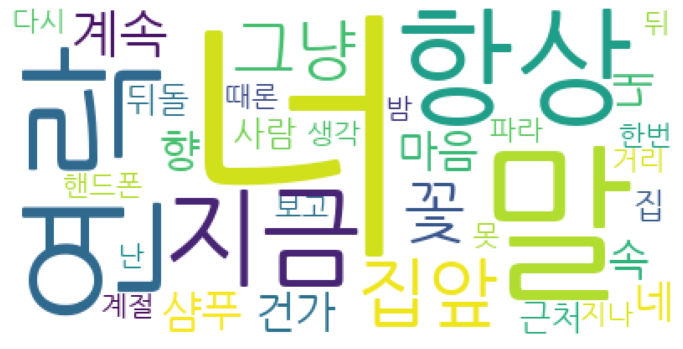

In [14]:
명사목록 = Text(okt.nouns(텍스트))
명사빈도 = 명사목록.vocab()
명사구름 = WordCloud(font_path = 폰트위치,background_color='white').generate_from_frequencies(명사빈도)
plt.figure(figsize=(12,12))
plt.imshow(명사구름)
plt.axis("off")
plt.show()

In [15]:
def 명사구름만들기(text,color):
    명사목록 = Text(okt.nouns(text))
    명사빈도 = 명사목록.vocab()
    명사구름 = WordCloud(font_path = 폰트위치,background_color='white',colormap = color).generate_from_frequencies(명사빈도)
    plt.figure(figsize=(12,12))
    plt.imshow(명사구름)
    plt.axis("off")
    plt.show()

#### 사용할 수 있는 color 테마
'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r

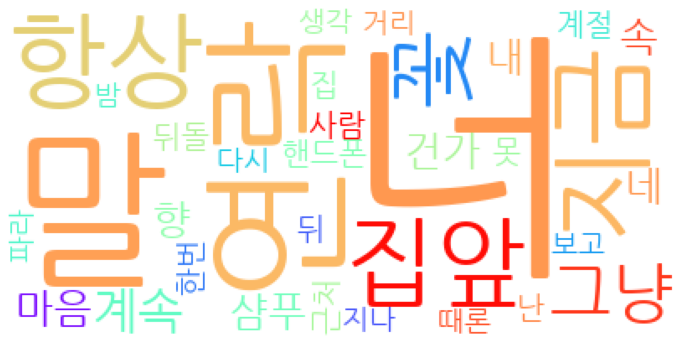

In [16]:
명사구름만들기(텍스트,'rainbow')

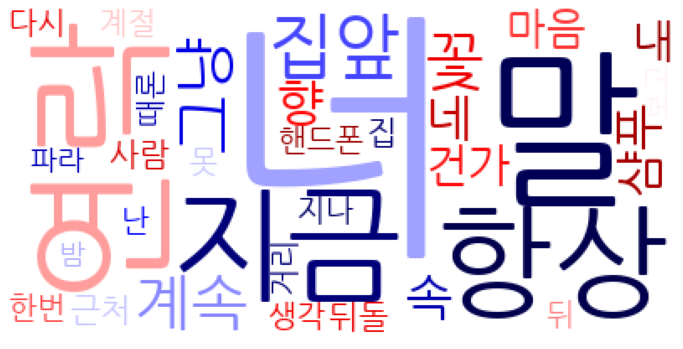

In [17]:
명사구름만들기(텍스트,'seismic')

#### 이미지 모양에 맞춰 출력해보기

(-0.5, 509.5, 451.5, -0.5)

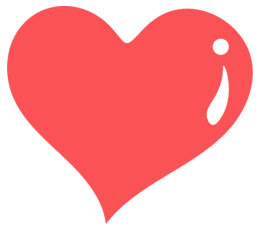

In [18]:
import numpy as np
from PIL import Image

icon = Image.open('하트.png')    # 마스크가 될 이미지 불러오기 
mask = Image.new("RGB", icon.size, (255,255,255))
mask.paste(icon,icon)
mask1 = np.array(mask)
plt.imshow(mask1)
plt.axis("off")

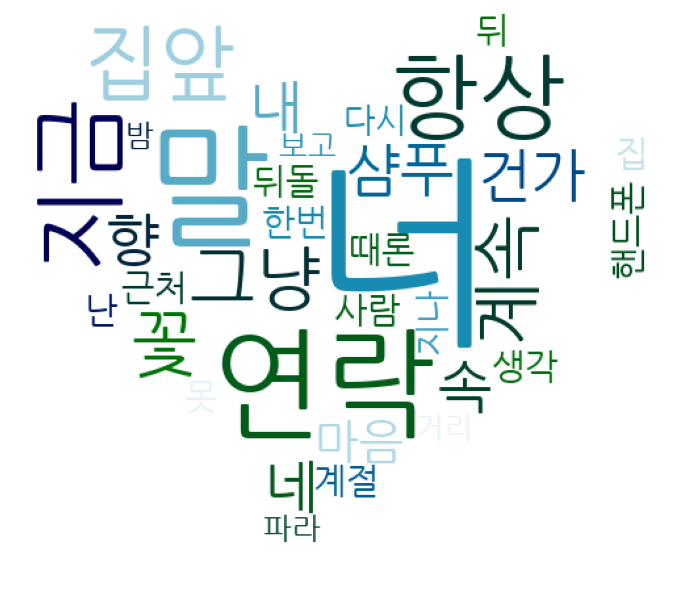

In [19]:
명사목록 = Text(okt.nouns(텍스트))
하트문자 = WordCloud(background_color="white",mask=mask1,font_path=폰트위치,colormap = "ocean").generate_from_frequencies(명사목록.vocab())
plt.figure(figsize=(12,12))
plt.imshow(하트문자)
plt.axis("off")
plt.show()

### 판다스

- 데이터 조작과 분석을 위한 파이썬 소프트웨어 라이브러리
- 엑셀처럼 많은 데이터를 열과 행 단위로 제어가 가능하고 빠른 속도로 실행
- 빅데이터 분석(데이터 시각화, 머신러닝)을 할 때 무조건 사용되는 라이브러리

![]()

[분석할 데이터 출처와 설명](https://www.data.go.kr/data/15066516/fileData.do)

In [20]:
! pip install pandas

You should consider upgrading via the 'c:\users\82102\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


#### 기존 데이터 살펴보기

In [21]:
import pandas as pd
food = pd.read_csv("용산구 맛집.csv")
pd.set_option('mode.chained_assignment',  None)

In [22]:
food.head()

,"종류(01한식,02중식,03일식,04양식,05기타외국음식,06디저트/카페)",테마(국가),업소명,전화번호,주소1,주소2,주요요리,위도,경도,사장님이자랑하는내가게한마디
0,3,일본,도쿄살롱,02-792-3068,서울특별시 용산구 회나무로 74,1층 이태원동,"주요메뉴 : 야끼토리6품 17,000, 매운차돌해물짬뽕 18,000 추천메뉴 : 야...",37.540407,126.994759,매일 신선한 재료로 정성껏 만든 수제꼬치
1,4,프랑스,바이휴고,070-4063-1642,서울특별시 용산구 이태원로17길 23-13,1층 이태원동,"주요메뉴 : 스트립도인 스테이크 41,000, 샴피뇽 파스타 22,000, 에스까르...",37.535466,126.991193,캐쥬얼한 프렌치 레스토랑
2,5,카메룬,Africanport,02-792-9214,서울특별시 용산구 이태원로14길 29-1,2층 이태원동,"주요메뉴 : 오크로 15,000, 졸러프라이스 15,000추천메뉴 : 오크로 15,000",37.533199,126.991216,아프리카의 품속으로
3,3,일본,고로킹,NaN,서울특별시 용산구 회나무로 29,1층 이태원동,"주요메뉴 : 멘치카츠(고기고로케) 4,500, 감자고로케 5,300추천메뉴 : 멘치...",37.539639,126.989857,지구에서 제일 맛있는 고로케
4,4,미국,매덕스피자이태원점,02-792-2420,서울특별시 용산구 이태원로26길 26,2층 이태원동,"주요메뉴 : 마르게리타피자(한조각 6,700/한판 49,000), 맥앤치즈베이컨피자...",37.533347,126.993524,뉴욕스타일의 조각피자


In [23]:
print(food.shape)
info = food.shape
print(info[0])
print(info[1])

(314, 10)
314
10


In [24]:
food.columns

Index(['종류(01한식,02중식,03일식,04양식,05기타외국음식,06디저트/카페)', '테마(국가)', '업소명', '전화번호',
       '주소1', '주소2', '주요요리', '위도', '경도', '사장님이자랑하는내가게한마디'],
      dtype='object')

#### 특정 데이터 접근

특정 열 선택 = 데이터프레임["열이름"]

In [25]:
food["업소명"]

0             도쿄살롱
1             바이휴고
2      Africanport
3              고로킹
4        매덕스피자이태원점
          ...     
309           프로메사
310      비밀(BMeal)
311           진돈부리
312        스시제트(Z)
313     르사이공(이태원점)
Name: 업소명, Length: 314, dtype: object

특정 복수개의 열 선택 = 데이터프레임[[열이름 리스트]]

In [26]:
food[["업소명","전화번호"]]

,업소명,전화번호
0,도쿄살롱,02-792-3068
1,바이휴고,070-4063-1642
2,Africanport,02-792-9214
3,고로킹,NaN
4,매덕스피자이태원점,02-792-2420
...,...,...
309,프로메사,02-515-4075
310,비밀(BMeal),02-797-0715
311,진돈부리,02-797-1179
312,스시제트(Z),02-795-4267


특정 범위의 행 선택 = 데이터프레임[시작:끝]

In [27]:
food[0:5]

,"종류(01한식,02중식,03일식,04양식,05기타외국음식,06디저트/카페)",테마(국가),업소명,전화번호,주소1,주소2,주요요리,위도,경도,사장님이자랑하는내가게한마디
0,3,일본,도쿄살롱,02-792-3068,서울특별시 용산구 회나무로 74,1층 이태원동,"주요메뉴 : 야끼토리6품 17,000, 매운차돌해물짬뽕 18,000 추천메뉴 : 야...",37.540407,126.994759,매일 신선한 재료로 정성껏 만든 수제꼬치
1,4,프랑스,바이휴고,070-4063-1642,서울특별시 용산구 이태원로17길 23-13,1층 이태원동,"주요메뉴 : 스트립도인 스테이크 41,000, 샴피뇽 파스타 22,000, 에스까르...",37.535466,126.991193,캐쥬얼한 프렌치 레스토랑
2,5,카메룬,Africanport,02-792-9214,서울특별시 용산구 이태원로14길 29-1,2층 이태원동,"주요메뉴 : 오크로 15,000, 졸러프라이스 15,000추천메뉴 : 오크로 15,000",37.533199,126.991216,아프리카의 품속으로
3,3,일본,고로킹,NaN,서울특별시 용산구 회나무로 29,1층 이태원동,"주요메뉴 : 멘치카츠(고기고로케) 4,500, 감자고로케 5,300추천메뉴 : 멘치...",37.539639,126.989857,지구에서 제일 맛있는 고로케
4,4,미국,매덕스피자이태원점,02-792-2420,서울특별시 용산구 이태원로26길 26,2층 이태원동,"주요메뉴 : 마르게리타피자(한조각 6,700/한판 49,000), 맥앤치즈베이컨피자...",37.533347,126.993524,뉴욕스타일의 조각피자


특정 조건을 만족하는 행 선택

==> 데이터프레임[[각 행들에 대한 선택여부가 저장된 True 나 False 정보값]]

ex)

데이터프레임[[true,false,true,false,...]] => 0번째 행과 2번째 행을 선택한다는 의미

In [28]:
show_list = []
food_info = food.shape
food_rows = food_info[0]
for i in range(food_rows):
    if i % 2 == 1:
        show_list.append(True)
    else:
        show_list.append(False)

In [29]:
food[show_list]

,"종류(01한식,02중식,03일식,04양식,05기타외국음식,06디저트/카페)",테마(국가),업소명,전화번호,주소1,주소2,주요요리,위도,경도,사장님이자랑하는내가게한마디
1,4,프랑스,바이휴고,070-4063-1642,서울특별시 용산구 이태원로17길 23-13,1층 이태원동,"주요메뉴 : 스트립도인 스테이크 41,000, 샴피뇽 파스타 22,000, 에스까르...",37.535466,126.991193,캐쥬얼한 프렌치 레스토랑
3,3,일본,고로킹,NaN,서울특별시 용산구 회나무로 29,1층 이태원동,"주요메뉴 : 멘치카츠(고기고로케) 4,500, 감자고로케 5,300추천메뉴 : 멘치...",37.539639,126.989857,지구에서 제일 맛있는 고로케
5,4,미국,미트볼라운지,02-790-1102,서울특별시 용산구 이태원로54길 36,1층 한남동,"주요메뉴 : 클래식 토마토소스와 미국엄마손맛 소고기미트볼플래터 25,000, 육즙이...",37.536785,127.001607,Fast casual dining pub 미트볼전문점으로 다양한 미국식 퓨전음식과 ...
7,3,일본,솔로스키친,02-6399-7447,서울특별시 용산구 이태원로 294,2층 한남동,"주요메뉴 : 치킨가라아게덮밥 10,500 새우야채덮밥 11,000 추천메뉴 : 치킨...",37.540868,127.002485,혼공족'을 위해 간편하게 테이크아웃해서 어디서든 편안하게 먹을 수 있는 건강한 한그...
9,4,미국,앤와이비엔비버거엔베이글,02-553-7792,서울특별시 용산구 이태원로55나길 6,1층 한남동,"주요메뉴 : The B&amp;B 14,500 Uptown Girl 16,500 T...",37.536666,126.999095,한국에서 느낄 수 있는 뉴욕 맨하탄의 버거 맛
...,...,...,...,...,...,...,...,...,...,...
305,5,터키,케르반레스토랑,02-792-4767,서울특별시 용산구 이태원로 190,(이태원동),"주요메뉴 : 요거트 치킨 케밥 21,000, 믹스피데 24,500추천메뉴 : 케르반...",37.534356,126.995148,NaN
307,5,터키,앙카라펠레스,02-3785-3787,서울특별시 용산구 이태원로 192,(이태원동),"주요메뉴 : Mixed Grill 30,000 Faruk pirzola 18,000...",37.534367,126.995370,NaN
309,5,파라과이,프로메사,02-515-4075,서울특별시 용산구 이태원로14길 26,(이태원동),"주요메뉴 : 세코데치보 24,000, 퀴노아샐러드 13,000추천메뉴 : 로모살떼아...",37.533202,126.990849,NaN
311,5,일본,진돈부리,02-797-1179,서울특별시 용산구 이태원로55가길 38,지상1층 (한남동),"주요메뉴 : 믹소동 8,000, 규동 9,000추천메뉴 : 아부리사케동 11,000",37.536882,126.999534,일본재료를 사용해서 당일 판매재료만 판매합니다.


In [30]:
food["테마(국가)"]=="일본"

0       True
1      False
2      False
3       True
4      False
       ...  
309    False
310    False
311     True
312     True
313    False
Name: 테마(국가), Length: 314, dtype: bool

In [31]:
food[food["테마(국가)"]=="일본"]

,"종류(01한식,02중식,03일식,04양식,05기타외국음식,06디저트/카페)",테마(국가),업소명,전화번호,주소1,주소2,주요요리,위도,경도,사장님이자랑하는내가게한마디
0,3,일본,도쿄살롱,02-792-3068,서울특별시 용산구 회나무로 74,1층 이태원동,"주요메뉴 : 야끼토리6품 17,000, 매운차돌해물짬뽕 18,000 추천메뉴 : 야...",37.540407,126.994759,매일 신선한 재료로 정성껏 만든 수제꼬치
3,3,일본,고로킹,NaN,서울특별시 용산구 회나무로 29,1층 이태원동,"주요메뉴 : 멘치카츠(고기고로케) 4,500, 감자고로케 5,300추천메뉴 : 멘치...",37.539639,126.989857,지구에서 제일 맛있는 고로케
7,3,일본,솔로스키친,02-6399-7447,서울특별시 용산구 이태원로 294,2층 한남동,"주요메뉴 : 치킨가라아게덮밥 10,500 새우야채덮밥 11,000 추천메뉴 : 치킨...",37.540868,127.002485,혼공족'을 위해 간편하게 테이크아웃해서 어디서든 편안하게 먹을 수 있는 건강한 한그...
10,3,일본,유타로,02-797-5776,서울특별시 용산구 이태원로 216,1층 한남동,"주요메뉴 : 시로 7,000, 쿠로 8,000추천메뉴 : 시로 7,000",37.534688,126.998135,"먹는 것 이상의 맛있는 즐거운, 하키타 일본라면"
11,3,일본,후지야마소바,02-749-4129,서울특별시 용산구 이태원로 208,"1층 6,7호 한남동","주요메뉴 : 자루소바 3,800, 키츠네우동 3,800추천메뉴 : 지루소바 3,800",37.534540,126.997058,일본에서 먹어본 맛을 즐길 수 있어요
16,6,일본,도쿄빙수경리단길점,070-7812-9584,서울특별시 용산구 녹사평대로46길 10,1층 이태원동,"주요메뉴 : 토마토빙수 8,900 말차빙수 10,500 키리모찌 6,500추천메뉴 ...",37.537260,126.987414,지구상에서 가장 맛있는 빙수가 있는 도쿄빙수
28,3,일본,유다 야키토리,02-388-5081,서울특별시 용산구 이태원로 230-2,NaN,"주요메뉴 : 사시미 40,000원 ~ 80,000원, 꼬치모듬 19,800원, 나베...",37.535581,126.999416,최고의 야끼도리 전문점
29,3,일본,도쿄쟁반,02-3785-0913,서울특별시 용산구 이태원로54길 58-9,NaN,"주요메뉴 : 함박스테이크 15,000원, 카레우동 9,000원추천메뉴 : 함박스테이...",37.535621,127.000665,식물들과 함께하는 도쿄가정식
31,3,일본,하나마치,0505-1440-8556,서울특별시 용산구 이태원로54길 52,NaN,"주요메뉴 : 연어사시미 25,000, 갈비야사이 22,000, 차돌박이 숙주볶음 1...",37.536223,127.001195,꽃길 그대와 함께 하겠습니다.
33,3,일본,노리테이블,02-792-4427,서울특별시 용산구 녹사평대로40나길 1,지하1층 이태원동,"주요메뉴 : 핸드롤 데마끼(2개) - 4,000 ~ 10,000원마끼(6개!8개) ...",37.534611,126.988030,캐쥬얼 일식 및 사케바


In [32]:
food[food["종류(01한식,02중식,03일식,04양식,05기타외국음식,06디저트/카페)"]== 2]

,"종류(01한식,02중식,03일식,04양식,05기타외국음식,06디저트/카페)",테마(국가),업소명,전화번호,주소1,주소2,주요요리,위도,경도,사장님이자랑하는내가게한마디
17,2,중국,누랑즈뉘,02-797-0709,서울특별시 용산구 녹사평대로46길 34-2,1층 이태원동,"주요메뉴 : 항정살탕수육 20,700, 멘보샤 15,700추천메뉴 : 항정살 탕수육...",37.537451,126.988649,"칠석, 견우직녀가 일년에 한번 만나는 뜻깊고 소중한 시간인 만큼, 누랑즈뉘에서 인연..."
24,2,대만,우육미엔 이태원점,02-798-5556,서울특별시 용산구 이태원로55가길 26-8,NaN,"주요메뉴 : 마라우육미엔 10,500원, 꿔바로우 12,000원, 자샤랑군 6,00...",37.537513,126.999900,대만현지 30년 경력의 Tony Kang쉐프와 국내 3인이 모여 대만 본토보다 맛있...
25,2,홍콩,완차이야,NaN,서울특별시 용산구 녹사평대로54길 19,NaN,"주요메뉴 : 완차이야플래터 26,000원, 마카오볶음면 12,000원, 우육면 10...",37.539192,126.988400,홍콩의 분위기와 맛을 그대로 재현해 드립니다.


특정 행과 열을 선택하는 방법

- 데이터프레임[행 정보][열 정보]

- 데이터프레임[열 정보][행 정보]라고 해도 동일하게 동작

- 행 정보가 생략되는 경우에는 전체 행을 선택되고 열 정보가 생략되는 경우에는 모든 열을 선택되는 걸로 된다.

In [33]:
food[food["테마(국가)"]=="미국"][["업소명","사장님이자랑하는내가게한마디"]]

,업소명,사장님이자랑하는내가게한마디
4,매덕스피자이태원점,뉴욕스타일의 조각피자
5,미트볼라운지,Fast casual dining pub 미트볼전문점으로 다양한 미국식 퓨전음식과 ...
9,앤와이비엔비버거엔베이글,한국에서 느낄 수 있는 뉴욕 맨하탄의 버거 맛
14,매덕스피자한남점,뉴욕스타일의 조각피자
15,빌리스팬케이크,맛있는 팬케이크와 루프탑이 있는 경리단 대표카페
18,로코스핑크솔트,고기가 듬뿍 들어있는 미국식 수제버거 맛집
36,이태원 더 버거,숯불에 구워 육즙이 풍부하고 스모크향의 맛을 느낄 수 있는 수제버거
39,플라잉볼 익스프레스 이태원점,최고의 맛은 번으로 결정된다.
40,크리에잇쿠키,유기농 밀로 만든 미국식 쿠키 전문점
50,다운타우너,한남동 수제버거


In [34]:
food[["업소명","전화번호"]][food["테마(국가)"]=="일본"]

,업소명,전화번호
0,도쿄살롱,02-792-3068
3,고로킹,NaN
7,솔로스키친,02-6399-7447
10,유타로,02-797-5776
11,후지야마소바,02-749-4129
16,도쿄빙수경리단길점,070-7812-9584
28,유다 야키토리,02-388-5081
29,도쿄쟁반,02-3785-0913
31,하나마치,0505-1440-8556
33,노리테이블,02-792-4427


홀수 번째 행이면 가게명을 짝수 번째 행이면 테마 국가를 출력하는 코드를 작성해보자

In [35]:
rows = food.shape[0]
for i in range(rows):
    if i %2 == 0:
        print(food["테마(국가)"][i])
    else:
        print(food["업소명"][i])

일본
바이휴고
카메룬
고로킹
미국
미트볼라운지
이탈리아
솔로스키친
요르단
앤와이비엔비버거엔베이글
일본
후지야마소바
이탈리아
포하우스
미국
빌리스팬케이크
일본
누랑즈뉘
미국
타지펠리스
이탈리아
골든불
태국
낭낭
대만
완차이야
이탈리아
베트남고향식당3호점
일본
도쿄쟁반
태국
하나마치
멕시코
노리테이블
중동(파키스탄)
반미리
미국
토키바야마
인도
플라잉볼 익스프레스 이태원점
미국
dubstep B (덥스텝 비)
이탈리아
스윗비
프랑스
그린내
러시아
스시고코로
이탈리아
스톤그라운드
미국
오만지아
이집트
핏제리아디부자 1호점
베트남
더 젤
호주
유피피
미국
나인티모
이탈리아
산토리니
미국
쟈니덤플링2호점
미국
인더랩(In The Lab)
일본
(주)마렘마트라토리아
프랑스
스파이시바이트(Spicy Bite)
일본
알밤(ALBAM)
미국
자리
이탈리아
펍앤그릴 프라하
이탈리아
길티플레져(Guilty Pleasure)
중국
스시원(one)
영국
도르프
유럽
스티키팟한남점
터키
미스터케밥 2호점
터키
디트로이트
이탈리아
웨스턴차이나
베트남
함바그또카레야
이탈리아
챠크라
이탈리아
바나나그릴
베트남
타마린드
미국
42사이
일본
81번옥
중국
티그레
미국
미카
일본
알사바페르시안퀸
유럽
이치더힐
유럽
(주)어번그룹 바토스 이태원점
이탈리아
벨그레이드(Belgrade)
이탈리아/일본
두에꼬제
멕시코
갈로(Gallo)
이탈리아
마인드
이탈리아
그린바스켓
일본
엘본더테이블 이태원점
중국
베라나폴리
이탈리아
아피아
이탈리아
왕타이
인도
(주)오리지널팬케이크하우스(이태원점)
브라질
에이치엘씨(유)
미국
알리바바
멕시코
(주)타이가든
베트남
어메이징타이
미국
트레비아(Trevia)
이탈리아
라멘81
이탈리아
길버트버거앤프라이즈이태원
홍콩
오베이(5Bey)
호주
빌리스테이블
태국
맷크로켓
쿠바
엘그레코스
미국
로얄맨션
미국
매니멀스모크하우스
태국
따뻬오(Tapeo)
독일
킨덜스
베트남
페트라
멕시코
불앤배럴(BULL&BARREL)
이탈리아
대한각
우즈베키스탄
룸에이치(Room H)
멕시코
포포

#### 데이터 특성 추가

새로운 열 추가

데이터프레임[추가할 열이름] = 초기화할 값

In [36]:
food["음식종류"] = ""
food.head()

,"종류(01한식,02중식,03일식,04양식,05기타외국음식,06디저트/카페)",테마(국가),업소명,전화번호,주소1,주소2,주요요리,위도,경도,사장님이자랑하는내가게한마디,음식종류
0,3,일본,도쿄살롱,02-792-3068,서울특별시 용산구 회나무로 74,1층 이태원동,"주요메뉴 : 야끼토리6품 17,000, 매운차돌해물짬뽕 18,000 추천메뉴 : 야...",37.540407,126.994759,매일 신선한 재료로 정성껏 만든 수제꼬치,
1,4,프랑스,바이휴고,070-4063-1642,서울특별시 용산구 이태원로17길 23-13,1층 이태원동,"주요메뉴 : 스트립도인 스테이크 41,000, 샴피뇽 파스타 22,000, 에스까르...",37.535466,126.991193,캐쥬얼한 프렌치 레스토랑,
2,5,카메룬,Africanport,02-792-9214,서울특별시 용산구 이태원로14길 29-1,2층 이태원동,"주요메뉴 : 오크로 15,000, 졸러프라이스 15,000추천메뉴 : 오크로 15,000",37.533199,126.991216,아프리카의 품속으로,
3,3,일본,고로킹,NaN,서울특별시 용산구 회나무로 29,1층 이태원동,"주요메뉴 : 멘치카츠(고기고로케) 4,500, 감자고로케 5,300추천메뉴 : 멘치...",37.539639,126.989857,지구에서 제일 맛있는 고로케,
4,4,미국,매덕스피자이태원점,02-792-2420,서울특별시 용산구 이태원로26길 26,2층 이태원동,"주요메뉴 : 마르게리타피자(한조각 6,700/한판 49,000), 맥앤치즈베이컨피자...",37.533347,126.993524,뉴욕스타일의 조각피자,


In [37]:
음식종류 = {1:"한식",2:"중식",3:"일식",4:"양식",5:"기타외국음식",6:"디저트/카페"}
rows = food.shape[0]
for row in range(rows):
    종류 = food["종류(01한식,02중식,03일식,04양식,05기타외국음식,06디저트/카페)"][row] 
    food["음식종류"][row] = 음식종류[종류]

In [38]:
food.head()

,"종류(01한식,02중식,03일식,04양식,05기타외국음식,06디저트/카페)",테마(국가),업소명,전화번호,주소1,주소2,주요요리,위도,경도,사장님이자랑하는내가게한마디,음식종류
0,3,일본,도쿄살롱,02-792-3068,서울특별시 용산구 회나무로 74,1층 이태원동,"주요메뉴 : 야끼토리6품 17,000, 매운차돌해물짬뽕 18,000 추천메뉴 : 야...",37.540407,126.994759,매일 신선한 재료로 정성껏 만든 수제꼬치,일식
1,4,프랑스,바이휴고,070-4063-1642,서울특별시 용산구 이태원로17길 23-13,1층 이태원동,"주요메뉴 : 스트립도인 스테이크 41,000, 샴피뇽 파스타 22,000, 에스까르...",37.535466,126.991193,캐쥬얼한 프렌치 레스토랑,양식
2,5,카메룬,Africanport,02-792-9214,서울특별시 용산구 이태원로14길 29-1,2층 이태원동,"주요메뉴 : 오크로 15,000, 졸러프라이스 15,000추천메뉴 : 오크로 15,000",37.533199,126.991216,아프리카의 품속으로,기타외국음식
3,3,일본,고로킹,NaN,서울특별시 용산구 회나무로 29,1층 이태원동,"주요메뉴 : 멘치카츠(고기고로케) 4,500, 감자고로케 5,300추천메뉴 : 멘치...",37.539639,126.989857,지구에서 제일 맛있는 고로케,일식
4,4,미국,매덕스피자이태원점,02-792-2420,서울특별시 용산구 이태원로26길 26,2층 이태원동,"주요메뉴 : 마르게리타피자(한조각 6,700/한판 49,000), 맥앤치즈베이컨피자...",37.533347,126.993524,뉴욕스타일의 조각피자,양식


In [39]:
food[food["음식종류"]=="양식"]

,"종류(01한식,02중식,03일식,04양식,05기타외국음식,06디저트/카페)",테마(국가),업소명,전화번호,주소1,주소2,주요요리,위도,경도,사장님이자랑하는내가게한마디,음식종류
1,4,프랑스,바이휴고,070-4063-1642,서울특별시 용산구 이태원로17길 23-13,1층 이태원동,"주요메뉴 : 스트립도인 스테이크 41,000, 샴피뇽 파스타 22,000, 에스까르...",37.535466,126.991193,캐쥬얼한 프렌치 레스토랑,양식
4,4,미국,매덕스피자이태원점,02-792-2420,서울특별시 용산구 이태원로26길 26,2층 이태원동,"주요메뉴 : 마르게리타피자(한조각 6,700/한판 49,000), 맥앤치즈베이컨피자...",37.533347,126.993524,뉴욕스타일의 조각피자,양식
5,4,미국,미트볼라운지,02-790-1102,서울특별시 용산구 이태원로54길 36,1층 한남동,"주요메뉴 : 클래식 토마토소스와 미국엄마손맛 소고기미트볼플래터 25,000, 육즙이...",37.536785,127.001607,Fast casual dining pub 미트볼전문점으로 다양한 미국식 퓨전음식과 ...,양식
6,4,이탈리아,스테이지비,02-6399-7545,서울특별시 용산구 이태원로 294,2층 한남동,"주요메뉴 : 립아이스테이크 38,000 키조개샐러드 21,000 크랩크림파스타 27...",37.540868,127.002485,외식과 문화가 공존하는 예술의 공간,양식
9,4,미국,앤와이비엔비버거엔베이글,02-553-7792,서울특별시 용산구 이태원로55나길 6,1층 한남동,"주요메뉴 : The B&amp;B 14,500 Uptown Girl 16,500 T...",37.536666,126.999095,한국에서 느낄 수 있는 뉴욕 맨하탄의 버거 맛,양식
12,4,이탈리아,일키아쏘,02-792-5588,서울특별시 용산구 이태원로55가길 21,1층 3호 한남동,"주요메뉴 : 티본스테이크(600g부터 가능 100g당 15,000), 프로슈토 20...",37.537380,127.000258,한남동에 위치한 이탈리아 본고장의 맛과 분위기를 느낄 수 있는 이탈리아 레스토랑,양식
14,4,미국,매덕스피자한남점,02-790-2420,서울특별시 용산구 독서당로29길 5-6,"G동 2층 202호 한남동, 리플레이스 한남","주요메뉴 : 마르게리타피자(한조각 6,700/한판 49,000), 맥앤치즈베이컨피자...",37.536950,127.011518,뉴욕스타일의 조각피자,양식
15,4,미국,빌리스팬케이크,02-790-3315,서울특별시 용산구 녹사평대로46길 16-4,2층 이태원동,"주요메뉴 : 오리지널 팬케이크 8,300, 티라미수 팬케이크 14,900추천메뉴 :...",37.537134,126.987789,맛있는 팬케이크와 루프탑이 있는 경리단 대표카페,양식
18,4,미국,로코스핑크솔트,02-792-3235,서울특별시 용산구 녹사평대로26가길 14,1층 이태원동,"주요메뉴 : 루벤 샌드위치 11,900, 브리스켓 샌드위치 11,900추천메뉴 : ...",37.532305,126.992429,고기가 듬뿍 들어있는 미국식 수제버거 맛집,양식
20,4,이탈리아,비스테까 토레엔,02-797-7746,서울특별시 용산구 회나무로 66,지상 3층 이태원동,"주요메뉴 : 포터하우스 스테이크 100g당 26,000원(최소주문700g), 토마토...",37.540115,126.993849,서울에서 N타워가 가장 아름답게 보이는 torre N,양식


#### 필요없는 특성 삭제하기

- 열 삭제
데이터프레임.drop(columns = [삭제하고 싶은 열이름],axis=1)
- 행 삭제
데이터프레임.drop(index = [행의 위치] ,axis=0)

In [40]:
food = food.drop(columns =['종류(01한식,02중식,03일식,04양식,05기타외국음식,06디저트/카페)','위도','경도'], axis=1)

In [41]:
food.head()

,테마(국가),업소명,전화번호,주소1,주소2,주요요리,사장님이자랑하는내가게한마디,음식종류
0,일본,도쿄살롱,02-792-3068,서울특별시 용산구 회나무로 74,1층 이태원동,"주요메뉴 : 야끼토리6품 17,000, 매운차돌해물짬뽕 18,000 추천메뉴 : 야...",매일 신선한 재료로 정성껏 만든 수제꼬치,일식
1,프랑스,바이휴고,070-4063-1642,서울특별시 용산구 이태원로17길 23-13,1층 이태원동,"주요메뉴 : 스트립도인 스테이크 41,000, 샴피뇽 파스타 22,000, 에스까르...",캐쥬얼한 프렌치 레스토랑,양식
2,카메룬,Africanport,02-792-9214,서울특별시 용산구 이태원로14길 29-1,2층 이태원동,"주요메뉴 : 오크로 15,000, 졸러프라이스 15,000추천메뉴 : 오크로 15,000",아프리카의 품속으로,기타외국음식
3,일본,고로킹,NaN,서울특별시 용산구 회나무로 29,1층 이태원동,"주요메뉴 : 멘치카츠(고기고로케) 4,500, 감자고로케 5,300추천메뉴 : 멘치...",지구에서 제일 맛있는 고로케,일식
4,미국,매덕스피자이태원점,02-792-2420,서울특별시 용산구 이태원로26길 26,2층 이태원동,"주요메뉴 : 마르게리타피자(한조각 6,700/한판 49,000), 맥앤치즈베이컨피자...",뉴욕스타일의 조각피자,양식


In [42]:
food1 = food.drop(index= 1, axis=0)

In [43]:
food.head()

,테마(국가),업소명,전화번호,주소1,주소2,주요요리,사장님이자랑하는내가게한마디,음식종류
0,일본,도쿄살롱,02-792-3068,서울특별시 용산구 회나무로 74,1층 이태원동,"주요메뉴 : 야끼토리6품 17,000, 매운차돌해물짬뽕 18,000 추천메뉴 : 야...",매일 신선한 재료로 정성껏 만든 수제꼬치,일식
1,프랑스,바이휴고,070-4063-1642,서울특별시 용산구 이태원로17길 23-13,1층 이태원동,"주요메뉴 : 스트립도인 스테이크 41,000, 샴피뇽 파스타 22,000, 에스까르...",캐쥬얼한 프렌치 레스토랑,양식
2,카메룬,Africanport,02-792-9214,서울특별시 용산구 이태원로14길 29-1,2층 이태원동,"주요메뉴 : 오크로 15,000, 졸러프라이스 15,000추천메뉴 : 오크로 15,000",아프리카의 품속으로,기타외국음식
3,일본,고로킹,NaN,서울특별시 용산구 회나무로 29,1층 이태원동,"주요메뉴 : 멘치카츠(고기고로케) 4,500, 감자고로케 5,300추천메뉴 : 멘치...",지구에서 제일 맛있는 고로케,일식
4,미국,매덕스피자이태원점,02-792-2420,서울특별시 용산구 이태원로26길 26,2층 이태원동,"주요메뉴 : 마르게리타피자(한조각 6,700/한판 49,000), 맥앤치즈베이컨피자...",뉴욕스타일의 조각피자,양식


inplace
- 수정한 데이터프레임의 저장에 대한 선택 옵션
- 변수2 = 변수1.drop(... , inplace = 0)를 하게 되면 수정된 데이터프레임이 변수1에 반영되지 않고 변수2에만 저장
- 변수2 = 변수1.drop(... , inplace = 1)를 하게 되면 수정된 데이터프레임이 변수1과 변수2에 저장
- 디폴트 설정은 inplace = 0

#### 데이터를 통해 나에게 필요한 정보 분석하기

가격이 저렴한 맛집들의 정보들만 저장해보자

###### How? 

정규표현식을 사용해서 주요 요리열 데이터에 숫자 데이터만 추출해서 메뉴의 평균 가격 계산


##### 정규표현식

특정한 패턴을 가진 문자들에 대한 검색이 가능한 검색키워드


[] : 안에 적힌 문자들 중 하나가 포함된 패턴
- [bh]ook => cook [X] book,hook [O]
- [a-z] => A [X] a,v,z [0]

^ : 다음으로 적힌 문자는 제외한 나머지가 포함된 패턴 
- [^B]ook => Book [X] cook,Cook [O]
- [^a-z] => a,v,z [X] A,B,Z [O]

\* : 앞에 적힌 문자가 0개,1개 이상 반복하는 게 포함된 패턴 
- oo*h =>  oohh [X] oh,ooh,oooh [O] 

+: 앞에 적힌 문자가 1개 이상 반복하는 게 포함된 패턴
- oo+h => oh [X] ooh,oooh [O]

\d : 숫자가 포함된 키워드
- \d => 1, 9, 8 [0] 12,34,123 [X] ([0-9]와 같은 의미)
- \d{3} => 1,99 [X] 123,999 [O]
- \d{1,3} => 12,99 [X] 1,999 [O]
- \d+ => 모든 숫자 검색
- \d{2,3}-\d{3,4}-\d{4} => 02-823-0465, 010-1234-5678 전화번호나 휴대폰 번호 형태 검색
- \d,\d{3}원 => 1,000원 ~ 9,999원만 검색

In [44]:
import re

메뉴예시 = "100,000원 3,000원 90,000원"
menu_prices = re.findall(r'\d+,\d{3}',메뉴예시)
    
sum = 0
for price in menu_prices:
    val = price.replace(",","")#문장에 붙은 쉼표를 제거하는 함수
    num = int(val)#문장을 사칙연산이 가능한 숫자로 변환하는 함수
    sum = sum + num
sum

193000

In [45]:
def 평균가격(text):
    menu_prices = re.findall(r'\d+,\d{3}',text)
    sum = 0
    for price in menu_prices:
        val = price.replace(",","")
        num = int(val)
        sum = sum + num
    
    if len(menu_prices) == 0:
        return 0
    avgPrice = sum/len(menu_prices)
    
    return avgPrice

In [46]:
저렴한맛집 = pd.read_csv("용산구 맛집.csv")
음식종류 = {1:"한식",2:"중식",3:"일식",4:"양식",5:"기타외국음식",6:"디저트/카페"}
rows = 저렴한맛집.shape[0]
저렴한맛집["음식종류"] = ""
for row in range(rows):
    종류 = 저렴한맛집["종류(01한식,02중식,03일식,04양식,05기타외국음식,06디저트/카페)"][row] 
    저렴한맛집["음식종류"][row] = 음식종류[종류]

In [47]:
저렴한맛집["평균가격"] = 0
for row in range(len(food)):
    메뉴 = 저렴한맛집["주요요리"][row]
    저렴한맛집["평균가격"][row] = 평균가격(메뉴)
    if 저렴한맛집["평균가격"][row] > 10000:
        저렴한맛집.drop(index= row, axis=0,inplace=True)

In [48]:
저렴한맛집.head()

,"종류(01한식,02중식,03일식,04양식,05기타외국음식,06디저트/카페)",테마(국가),업소명,전화번호,주소1,주소2,주요요리,위도,경도,사장님이자랑하는내가게한마디,음식종류,평균가격
3,3,일본,고로킹,NaN,서울특별시 용산구 회나무로 29,1층 이태원동,"주요메뉴 : 멘치카츠(고기고로케) 4,500, 감자고로케 5,300추천메뉴 : 멘치...",37.539639,126.989857,지구에서 제일 맛있는 고로케,일식,4766
10,3,일본,유타로,02-797-5776,서울특별시 용산구 이태원로 216,1층 한남동,"주요메뉴 : 시로 7,000, 쿠로 8,000추천메뉴 : 시로 7,000",37.534688,126.998135,"먹는 것 이상의 맛있는 즐거운, 하키타 일본라면",일식,7333
11,3,일본,후지야마소바,02-749-4129,서울특별시 용산구 이태원로 208,"1층 6,7호 한남동","주요메뉴 : 자루소바 3,800, 키츠네우동 3,800추천메뉴 : 지루소바 3,800",37.534540,126.997058,일본에서 먹어본 맛을 즐길 수 있어요,일식,3800
13,5,베트남,포하우스,02-793-5220,서울특별시 용산구 이태원로20길 2-12,2층 이태원동,"주요메뉴 : 베트남쌀국수 8,000~11,000, 팟타이 12,000 추천메뉴 : ...",37.533930,126.991523,베트남쌀국수가 맛있는 이태원 포하우스,기타외국음식,10000
16,6,일본,도쿄빙수경리단길점,070-7812-9584,서울특별시 용산구 녹사평대로46길 10,1층 이태원동,"주요메뉴 : 토마토빙수 8,900 말차빙수 10,500 키리모찌 6,500추천메뉴 ...",37.537260,126.987414,지구상에서 가장 맛있는 빙수가 있는 도쿄빙수,디저트/카페,8700


In [49]:
저렴한맛집.to_csv("용산구 나만의 맛집리스트.csv",index=False)

#### 판다스 데이터 시각화

plt.hist(데이터프레임[시각화를 원하는 열이름])

In [50]:
matplotlib.rcParams["font.family"] = "NanumGothic"
폰트위치 = 'C:/Windows/Fonts/NanumGothic.ttf'

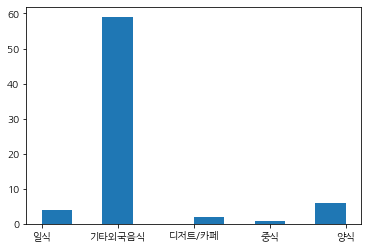

In [51]:
plt.hist(저렴한맛집["음식종류"])
plt.savefig("음식점비중.png")
plt.show()

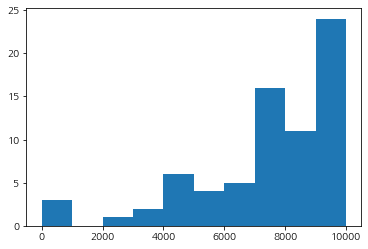

In [52]:
plt.hist(저렴한맛집["평균가격"])
plt.savefig("가격 분포.png")
plt.show()